# CS 584 Assignment 1 -- Text Classification (Machine Learning and NLP Basics)

#### Name: Varun Kumar Reddy D

## In this assignment, you are required to follow the steps below:
1. Review the lecture slides.
2. Implement the preprocessing.
3. Implement tokenization.
4. Implement feature extraction.
5. Implement Logistic Regression.
6. Implement Stochastic Gradient Descent and Mini-batch Gradient Descent.
7. Evaluate all the experiments and compare all the results.

*** Please read the code very carefully and install these packages (NumPy, Pandas, sklearn, tqdm, and matplotlib) before you start ***

## 1. Data Processing (30 points)

* Download the dataset from Canvas
* Load data by using Pandas
* Preprocessing
* Tokenization
* Split data
* Feature extraction (TF-IDF)

### 1.1 Load Data

Run the following cells (Please make sure the paths of data files are correct.)

In [1]:
import pandas as pd

train_df = pd.read_csv('./data/train.csv', header=None)
train_df.columns = ['label', 'title', 'text']
train_df.head()

,label,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [2]:
test_df = pd.read_csv('./data/test.csv', header=None)
test_df.columns = ['label', 'title', 'text']
test_df.head()

,label,title,text
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


### 1.2 Preprocess (Fill the code: 10 points)
In this section, you need to remove all the unrelated characters, including punctuation, urls, and numbers. Please fill up the functions and test them by running the following cell.

In [3]:
import re
import string

class Preprocesser(object):
    def __init__(self, punctuation=True, url=True, number=True):
        self.punctuation = punctuation
        self.url = url
        self.number = number
    
    def apply(self, text):
        
        text = self._lowercase(text)
        
        if self.url:
            text = self._remove_url(text)
            
        if self.punctuation:
            text = self._remove_punctuation(text)
            
        if self.number:
            text = self._remove_number(text)
        
        text = re.sub(r'\s+', ' ', text)
            
        return text
    
        
    def _remove_punctuation(self, text):
        ''' Please fill this function to remove all the punctuations in the text
        '''
        ### Start your code
        text = text.translate(str.maketrans('','', string.punctuation))     
        ### End
        
        return text
    
    def _remove_url(self, text):
        ''' Please fill this function to remove all the urls in the text
        '''
        ### Start your code
        url_pattern = re.compile("(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})")
        text = url_pattern.sub('', text)
        ### End
        
        return text
    
    def _remove_number(self, text):
        ''' Please fill this function to remove all the numbers in the text
        '''
        
        ### Start your code
        text = text.translate(str.maketrans('','',string.digits))
        ### End
        
        return text
    
    def _lowercase(self, text):
        ''' Please fill this function to lowercase the text
        '''
        
        ### Start your code
        text = text.lower()
        ### End
        
        return text

##### Test your implementation by running the following cell.

In [4]:
text = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processer = Preprocesser()
clean_text = processer.apply(text)

print(f'"{text}"') 
print('===>')
print(f'"{clean_text}"')

"Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."
===>
"interest rates are trimmed to by the south african central bank but the lack of warning hits the rand and surprises markets"


### 1.3 Tokenization (Fill the code: 5 points)

In [5]:
import nltk

def tokenize(text):
    ''' Please fill this function to tokenize text.
            1. Tokenize the text.
            2. Remove stop words.
            3. Optional: lemmatize words accordingly.
    '''
    
    ### Start your code
    tokens = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords]
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    ### End
    
    return tokens

##### Test your implementation by running the following cell.

In [6]:
text = "Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets."

processer = Preprocesser()
clean_text = processer.apply(text)
tokens = tokenize(clean_text)

print(f'{text} ==> {tokens}')

Interest rates are trimmed to 7.5 by the South African central bank (https://www.xxx.xxx), but the lack of warning hits the rand and surprises markets. ==> ['interest', 'rate', 'trimmed', 'south', 'african', 'central', 'bank', 'lack', 'warning', 'hit', 'rand', 'surprise', 'market']


### 1.4 Data split (Fill the code: 5 points)

In [7]:
from sklearn.model_selection import train_test_split

text_train = train_df['text'].values.astype(str)
label_train = train_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_test = test_df['text'].values.astype(str)
label_test = test_df['label'].values.astype(int) - 1 # -1 because labels start from 1


### Start your code, split the text_train and label_train into training and validation
### Make sure the names of varables are "text_train", "label_train", "text_valid", and "label_valid"

text_train, text_valid, label_train, label_valid = train_test_split(text_train, label_train, shuffle=False)
### End

print('The size of training set:', text_train.shape[0])
print('The size of validation set:', text_valid.shape[0])
print('The size of test set:', text_test.shape[0])

The size of training set: 90000
The size of validation set: 30000
The size of test set: 7600


### 1.5 Feature Extraction (Fill the code: 10 points)

In [8]:
from collections import defaultdict, Counter
import numpy as np
from tqdm.notebook import tqdm

class TfIdfExtractor(object):
    
    def __init__(self, vocab_size=None):
        self.vocab_size = vocab_size
        
        self.vocab = defaultdict(lambda: 0)
        self.word2idx = {}
        self.df = defaultdict(lambda: 0)
        self.num_doc = 0
        
        self.processer = Preprocesser()
        
        
    def fit(self, texts):
        ''' In this function, you are required to implement the fitting process.
                1. Construct the vocabulary (self.vocab).
                2. Construct the document frequency dictionary (self.df).
                3. Sort the vocabulary based on the frequency (self.vocab).
            Input:
                texts: a list of text (training set)
            Output:
                None
        '''
        self.num_doc = len(texts)
        
        for text in tqdm(texts, desc='fitting text'):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            ### Start your code (step 1 & 2)
            tokens_counter = Counter(tokens)
            for i,j in tokens_counter.items():
                self.vocab[i] += j
                self.df[i] += 1
            ### End
        
        ### Start your code (Step 3)
        self.vocab = {i:j for i,j in sorted(self.vocab.items(), key=lambda x:x[1], reverse=True)}
        ### End
        
        if self.vocab_size is not None:
            self.vocab = {key: self.vocab[key] for key in list(self.vocab.keys())[:self.vocab_size]}
        
        self.word2idx = {key: idx for idx, key in enumerate(self.vocab.keys())}


    def transform(self, texts):
        ''' In this function, you need to encode the input text into TF-IDF vector.
            Input:
                texts: a list of text.
            Ouput:
                a N-d matrix (Tf-Idf) 
        '''
        tfidf = np.zeros((len(texts), len(self.vocab)))
        
        for i, text in tqdm(enumerate(texts), desc='transforming', total=len(texts)):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            ### Start your code
            tokens_counter = Counter(tokens)

            for token, counter in tokens_counter.items():
                if token in self.vocab:
                    tfidf[i][self.word2idx[token]] = counter/min(len(tokens),self.vocab_size)

        idf_values = np.zeros((self.vocab_size))

        for i,j in self.df.items():
            if i in self.vocab:
                idf_values[self.word2idx[i]] = np.log((self.num_doc + 1)/(j + 1))+1
                
        tfidf = tfidf*idf_values[None:,]
            ### End
        
        return tfidf
                

##### Test your implementation by running the following cell.

In [9]:
extractor = TfIdfExtractor(vocab_size=10)
extractor.fit(text_train[:100])
X = extractor.transform(text_train[:10])

X[:5]


fitting text:   0%|          | 0/100 [00:00<?, ?it/s]

transforming:   0%|          | 0/10 [00:00<?, ?it/s]

array([[0.30463334, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.24370667, 0.        , 0.        , 0.        , 0.31302139,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.24370667, 0.        , 0.        , 0.        , 0.31302139,
        0.        , 0.        , 0.3535679 , 0.34178959, 0.        ],
       [0.24370667, 0.        , 0.        , 0.28425318, 0.        ,
        0.66250708, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.27247488, 0.        , 0.        , 0.        ,
        0.33125354, 0.        , 0.3535679 , 0.        , 0.        ]])

#### 1.5.4 Run the following code to obtain the TD-IDF and One-hot labels

In [10]:
# You can change this number to see the difference of the performances. (larger vocab size needs more memory)
vocab_size = 4000 
num_class = 4

extractor = TfIdfExtractor(vocab_size=vocab_size)
extractor.fit(text_train)

x_train = extractor.transform(text_train)
x_valid = extractor.transform(text_valid)
x_test = extractor.transform(text_test)


# convert label to one-hot vector
y_train = np.zeros((label_train.shape[0], num_class))
y_train[np.arange(label_train.shape[0]), label_train] = 1

y_valid = np.zeros((label_valid.shape[0], num_class))
y_valid[np.arange(label_valid.shape[0]), label_valid] = 1

y_test = np.zeros((label_test.shape[0], num_class))
y_test[np.arange(label_test.shape[0]), label_test] = 1


print('The size of training set:', x_train.shape)
print('The size of validation set:', x_valid.shape)
print('The size of test set:', x_test.shape)

fitting text:   0%|          | 0/90000 [00:00<?, ?it/s]

transforming:   0%|          | 0/90000 [00:00<?, ?it/s]

transforming:   0%|          | 0/30000 [00:00<?, ?it/s]

transforming:   0%|          | 0/7600 [00:00<?, ?it/s]

The size of training set: (90000, 4000)
The size of validation set: (30000, 4000)
The size of test set: (7600, 4000)


## 2. Logistic Regression (60 points)
In this section, you are required to implement a Logistic Regression(LR) model with $L_2$ regularization from scratch. 


The objective function of LR:

<center> $J = -\frac{1}{N}\sum_{i=1}^{N}\sum_{k=1}^{K}y_{ik}log\frac{e^{f_k}}{\sum_{c=1}^{K}e^{f_c}} + \lambda \sum_{j=1}^{d}w_{kj}^2$ </center>

**Deliverable 1**: Given the objective function, please show the steps to derive the graident of J with respecty of $w_k$. You can either list the steps in the notebook or submit a pdf with all the steps in the submission. **(10 points)**

### 2.1 LR and softmax function (Fill the code, 20 points)

In [11]:
def softmax(x):
    ''' Compute the softmax function for each row of the input x.
        
        Inputs:
            x: A D dimensional vector or N x D dimensional numpy matrix.
        Outputs:
            x: You are allowed to modify x in-place
    '''
    ### Start your code
    x = np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)
    ### End

    return x


class LogisticRegression(object):
    
    def __init__(self, vocab_size, num_class, lam):
        self.vocab_size = vocab_size
        self.num_class = num_class
        self.lam = lam
        
        ### Start your code (initialize weight(w) and bias(b))
        ### hint: you could use np.random.rand() to randomly initialize the parameters
        self.w = np.random.rand(self.num_class, self.vocab_size)
        self.b = np.random.rand(self.num_class)
        ### End
        
    def objective(self, x, y):
        ''' Implement the objective function
            Inputs:
                x: N-d matrix
                y: N-K matrix
            Output:
                the objective value of LR (scalar)
        '''
        loss = 0
        
        ### Start your code
        h = softmax(np.matmul(x,self.w.T) + self.b)
        loss = (-1/x.shape[0])*np.sum(y*np.log(h)) + self.lam*np.sum(self.w**2)
        ### End
        
        return loss
        
    
    def gradient(self, x, y):
        ''' Implement the gradient of J with respect to w (in Deliverable 1)
            Inputs:
                x: N-d matrix
                y: N-K matrix
            Output:
                w_grad: the gradient of J w.r.t weight
                b_grad: the gradient of J w.r.t bias (K dimensional vector)
        '''

        n = x.shape[0]
        
        w_grad = 0. # 0 is just a placeholder, it should be a d-K matrix
        b_grad = 0. # 0 is just a placeholder, it should be a K dimensional matrix
        
        ### Start your code
        h = softmax(np.dot(x,self.w.T) + self.b)
        w_grad = (1/n)*np.matmul((h-y).T,x) + 2*self.lam*self.w
        b_grad = (1/n)*np.sum((h-y),axis=0)
        ### End
        
        return w_grad, b_grad
    
    
    def gradient_descent(self, w_grad, b_grad, lr):
        ''' Implement the graident descent. 
            Updating weights and bias based on Equation: w = w - learning_rate * gradient)
            
            Inputs:
                w_grad: a matrix which is the gradient of J w.r.t to weight
                b_grad: a vector wich is the graident of J w.r.t to bias
            Output:
                None
        '''
        
        ### Start your code
        self.w = self.w - lr*w_grad
        self.b = self.b - lr*b_grad
        ### End
        

    
    def predict(self, x):
        y_hat = softmax(np.matmul(x, self.w.T)+self.b).squeeze()
        return np.argmax(y_hat, axis=-1)

### 2.2 Stochastic Gradient Descent (SGD) (Fill the code, 15 points)

In [12]:
def sgd(model:LogisticRegression , X, y, X_valid, y_valid, lr, lam, num_epoch=100, progress_bar=True):
    ''' Implement SGD
        Inputs:
            X: N-d matrix
            y: N-K matrix
            lr: learning rate
            lam: lambda
            num_epoch: the number of epochs
        Output:
            1. A list of training losses against epoch
            2. A list of validation losses against epoch
    '''
    train_losses = []
    valid_losses = []
    
    n, _ = X.shape
    
    for e in range(num_epoch):
        train_loss = 0.
        
        ### Start your code here (Please implement SGD and obtain the training loss)
        losses = []
        for i in tqdm(range(n), desc='Epoch %d/%d: \t'%(e+1, num_epoch), total=n, display=progress_bar):
            train_loss += model.objective(X[i].reshape(1,-1), y[i].reshape(1,-1))
            w_grad, b_grad = model.gradient(X[i].reshape(1,-1), y[i].reshape(1,-1))
            model.gradient_descent(w_grad, b_grad, lr)
        train_loss /= n
        ### End
        
        valid_loss = 0.
        
        ### Start your code (Using validation set to obtain the validation loss)
        valid_loss = model.objective(X_valid,y_valid)
        ### End
        
        
        print(f'At epoch {e+1}, training loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}.')
        train_losses.append(train_loss)
        # train_losses.append(np.mean(losses))
        valid_losses.append(valid_loss)
        # valid_losses.append(np.mean(losses))

            
    return train_losses, valid_losses

Run SGD

In [13]:
''' Update the hyper-parameters (num_epoch, lr, and lam) according to your observation to achieve better performance.
'''
num_epoch = 20
lr = 0.001
lam = 1E-6

sgd_lr = LogisticRegression(vocab_size, num_class, lam)
sgd_train_losses, sgd_valid_losses = sgd(sgd_lr, x_train, y_train,x_valid, y_valid, lr, lam, num_epoch)

Epoch 1/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 1, training loss: 1.3152, validation loss: 1.2330.


Epoch 2/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 2, training loss: 1.1373, validation loss: 1.0904.


Epoch 3/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 3, training loss: 1.0061, validation loss: 0.9837.


Epoch 4/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 4, training loss: 0.9085, validation loss: 0.9028.


Epoch 5/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 5, training loss: 0.8344, validation loss: 0.8401.


Epoch 6/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 6, training loss: 0.7770, validation loss: 0.7905.


Epoch 7/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 7, training loss: 0.7314, validation loss: 0.7503.


Epoch 8/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 8, training loss: 0.6945, validation loss: 0.7172.


Epoch 9/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 9, training loss: 0.6639, validation loss: 0.6894.


Epoch 10/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 10, training loss: 0.6383, validation loss: 0.6658.


Epoch 11/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 11, training loss: 0.6165, validation loss: 0.6455.


Epoch 12/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 12, training loss: 0.5976, validation loss: 0.6278.


Epoch 13/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 13, training loss: 0.5812, validation loss: 0.6122.


Epoch 14/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 14, training loss: 0.5668, validation loss: 0.5984.


Epoch 15/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 15, training loss: 0.5539, validation loss: 0.5860.


Epoch 16/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 16, training loss: 0.5425, validation loss: 0.5749.


Epoch 17/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 17, training loss: 0.5321, validation loss: 0.5649.


Epoch 18/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 18, training loss: 0.5228, validation loss: 0.5557.


Epoch 19/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 19, training loss: 0.5142, validation loss: 0.5474.


Epoch 20/20: 	:   0%|          | 0/90000 [00:00<?, ?it/s]

At epoch 20, training loss: 0.5064, validation loss: 0.5397.


### 2.3 Mini-batch Gradient Descent (Fill the code: 15 points)

In [14]:
def mini_batch_gd(model, X, y, X_valid, y_valid, batch_size, lr, lam, num_epoch=100, progress_bar=True):
    ''' Implement SGD
        Inputs:
            X: N-d matrix
            y: N-K matrix
            lr: learning rate
            lam: lambda
            num_epoch: the number of epochs
        Output:
            1. A list of training losses against epoch
            2. A list of validation losses against epoch
    '''
    train_losses = []
    valid_losses = []
    
    n, _ = X.shape
    
    for e in range(num_epoch):
        train_loss = 0.
        
        ### Start your code here (Implement Mini-batch GD)
        loop_count = int(np.ceil(n/batch_size))
        
        for i in tqdm(range(loop_count), desc='Epoch %d/%d'%(e+1, num_epoch), total=loop_count, display=progress_bar):
            train_loss += model.objective(X[i*batch_size:(i+1)*batch_size], y[i*batch_size:(i+1)*batch_size])
            w_grad, b_grad = model.gradient(X[i*batch_size:(i+1)*batch_size], y[i*batch_size:(i+1)*batch_size])
            model.gradient_descent(w_grad, b_grad, lr)
        
        train_loss /= loop_count
                      
        ### End
        
        valid_loss = 0.
        
        ### Start your code (Using validation set to obtain the validation loss)
        valid_loss = model.objective(X_valid,y_valid)
        ### End
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'At epoch {e+1}, training loss: {train_loss:.4f}, validation loss: {valid_loss:.4f}.')
            
    return train_losses, valid_losses

Run Mini-batch GD

In [15]:
''' Update the hyper-parameters (num_epoch, lr, lam, and batch_size) according to your observation 
    to achieve better performance.
'''

num_epoch = 20
lr = 0.01
lam = 1E-6
batch_size = 32

mini_gd_lr = LogisticRegression(vocab_size, num_class, lam)
mini_gd_train_losses, mini_gd_valid_losses = mini_batch_gd(mini_gd_lr, x_train, y_train, x_valid, y_valid, batch_size, lr, lam, num_epoch)

Epoch 1/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 1, training loss: 1.4193, validation loss: 1.3859.


Epoch 2/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 2, training loss: 1.3466, validation loss: 1.3235.


Epoch 3/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 3, training loss: 1.2824, validation loss: 1.2664.


Epoch 4/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 4, training loss: 1.2239, validation loss: 1.2141.


Epoch 5/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 5, training loss: 1.1705, validation loss: 1.1665.


Epoch 6/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 6, training loss: 1.1220, validation loss: 1.1230.


Epoch 7/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 7, training loss: 1.0779, validation loss: 1.0833.


Epoch 8/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 8, training loss: 1.0378, validation loss: 1.0471.


Epoch 9/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 9, training loss: 1.0013, validation loss: 1.0140.


Epoch 10/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 10, training loss: 0.9681, validation loss: 0.9837.


Epoch 11/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 11, training loss: 0.9377, validation loss: 0.9560.


Epoch 12/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 12, training loss: 0.9100, validation loss: 0.9305.


Epoch 13/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 13, training loss: 0.8846, validation loss: 0.9070.


Epoch 14/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 14, training loss: 0.8612, validation loss: 0.8853.


Epoch 15/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 15, training loss: 0.8397, validation loss: 0.8653.


Epoch 16/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 16, training loss: 0.8198, validation loss: 0.8467.


Epoch 17/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 17, training loss: 0.8015, validation loss: 0.8295.


Epoch 18/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 18, training loss: 0.7844, validation loss: 0.8134.


Epoch 19/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 19, training loss: 0.7686, validation loss: 0.7984.


Epoch 20/20:   0%|          | 0/2813 [00:00<?, ?it/s]

At epoch 20, training loss: 0.7539, validation loss: 0.7844.


### 2.4 Evaluation
You are required to report the precision and recall for each category on test set and plot the training loss and validation loss for both SGD and Mini-batch GD

##### Please run the following cell to evaluate your model with SGD

In [16]:
from sklearn.metrics import precision_score, recall_score

y_hat = sgd_lr.predict(x_test)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_hat, average=None)
recall = recall_score(y_true, y_hat, average=None)

print('SGD')
print()
print('  Precision:')
print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
print()
print('  Recall:')
print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}')

SGD

  Precision:
    class 0: 0.8879, class 1: 0.8844, class 2: 0.8064, class 3: 0.8168

  Recall:
    class 0: 0.8379, class 1: 0.9542, class 2: 0.8068, class 3: 0.7979


##### Please run the following cell to plot training loss and validation loss for SGD

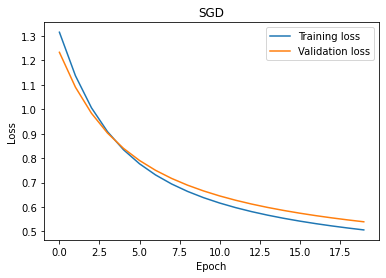

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline


plt.plot(range(num_epoch), sgd_train_losses, sgd_valid_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Training loss", "Validation loss"])
plt.title('SGD')
plt.show()

##### Please run the following cell to evaluate your model with Mini-batch GD

In [18]:
y_hat = mini_gd_lr.predict(x_test)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_hat, average=None)
recall = recall_score(y_true, y_hat, average=None)

print('Mini-batch GD')
print()
print('  Precision:')
print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
print()
print('  Recall:')
print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}')

Mini-batch GD

  Precision:
    class 0: 0.8375, class 1: 0.8405, class 2: 0.7662, class 3: 0.7505

  Recall:
    class 0: 0.7947, class 1: 0.9095, class 2: 0.7553, class 3: 0.7379


##### Please run the following cell to plot training loss and validation loss for Mini-batch GD

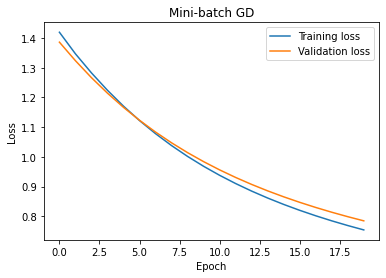

In [19]:
plt.plot(range(num_epoch), mini_gd_train_losses, mini_gd_valid_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["Training loss", "Validation loss"])
plt.title('Mini-batch GD')
plt.show()

## 3. Cross-Validation (10 points)

You are required to implement cross-validation, and use it to choose the best $\lambda$.


### 3.1 Reload dataset

In [20]:
text_train = train_df['text'].values.astype(str)
label_train = train_df['label'].values.astype(int) - 1 # -1 because labels start from 1

text_test = test_df['text'].values.astype(str)
label_test = test_df['label'].values.astype(int) - 1 # -1 because labels start from 1

### 3.2 Define the range of $\lambda$. (Fill the code)

In [21]:
lambdas = [1E-2,1E-4,1E-6,1E-8] ## Fill the values of lambda you want to evaluate in the list

### 3.3 Imlement cross-validation. (Fill the code)

In [22]:
### Start your code
vocab_size = 4000 
num_class = 4

extractor = TfIdfExtractor(vocab_size=vocab_size)
extractor.fit(text_train)

x_train = extractor.transform(text_train)
x_test = extractor.transform(text_test)

y_train = np.zeros((label_train.shape[0], num_class))
y_train[np.arange(label_train.shape[0]), label_train] = 1

y_test = np.zeros((label_test.shape[0], num_class))
y_test[np.arange(label_test.shape[0]), label_test] = 1

print('The size of training set:', x_train.shape)
print('The size of test set:', x_test.shape)
### End

fitting text:   0%|          | 0/120000 [00:00<?, ?it/s]

transforming:   0%|          | 0/120000 [00:00<?, ?it/s]

transforming:   0%|          | 0/7600 [00:00<?, ?it/s]

The size of training set: (120000, 4000)
The size of test set: (7600, 4000)


In [23]:
k = 5

x_train_batches = np.split(x_train, k)
y_train_batches = np.split(y_train, k)


mini_batch_losses = []
sgd_losses = []
for i in tqdm(lambdas, desc='Lambda values', total=len(lambdas)):
    sgd_lr = LogisticRegression(vocab_size, num_class, i)
    mini_gd_lr = LogisticRegression(vocab_size, num_class, i)
    mini_batch_loss = 0
    sgd_loss = 0
    for k_counter in tqdm(range(k), desc='K Fold iteration', total=k):
        xk_val = x_train_batches[k_counter]
        yk_val = y_train_batches[k_counter]
        xk_train = np.vstack((x_train_batches[:k_counter]+x_train_batches[k_counter+1:]))
        yk_train = np.vstack((y_train_batches[:k_counter]+y_train_batches[k_counter+1:]))
        k_sgd_train_losses, k_sgd_valid_losses = sgd(sgd_lr, xk_train, yk_train,xk_val, yk_val, i, lam, 1, False)
        k_mini_gd_train_losses,k_mini_gd_valid_losses = mini_batch_gd(mini_gd_lr, xk_train, yk_train, xk_val, yk_val, batch_size, i, lam, 1, False)
        sgd_loss += k_sgd_valid_losses[-1]
        mini_batch_loss += k_mini_gd_valid_losses[-1]
    sgd_loss /= k
    mini_batch_loss /= k
    sgd_losses.append(sgd_loss)
    mini_batch_losses.append(mini_batch_loss)

k_fold_table = pd.DataFrame({'Lambda': lambdas, 'SGD Loss': sgd_losses, 'Mini batch Loss': mini_batch_losses})
k_fold_table

Lambda values:   0%|          | 0/4 [00:00<?, ?it/s]

K Fold iteration:   0%|          | 0/5 [00:00<?, ?it/s]

At epoch 1, training loss: 2.6926, validation loss: 1.3659.
At epoch 1, training loss: 32.5213, validation loss: 17.4584.
At epoch 1, training loss: 1.3029, validation loss: 1.3522.
At epoch 1, training loss: 10.7094, validation loss: 6.1761.
At epoch 1, training loss: 1.3029, validation loss: 1.3514.
At epoch 1, training loss: 4.1493, validation loss: 2.7824.
At epoch 1, training loss: 1.3024, validation loss: 1.3532.
At epoch 1, training loss: 2.1756, validation loss: 1.7632.
At epoch 1, training loss: 1.3006, validation loss: 1.3457.
At epoch 1, training loss: 1.5808, validation loss: 1.4620.


K Fold iteration:   0%|          | 0/5 [00:00<?, ?it/s]

At epoch 1, training loss: 1.9777, validation loss: 1.9619.
At epoch 1, training loss: 2.0435, validation loss: 2.0242.
At epoch 1, training loss: 1.9419, validation loss: 1.9308.
At epoch 1, training loss: 2.0339, validation loss: 2.0194.
At epoch 1, training loss: 1.9168, validation loss: 1.8991.
At epoch 1, training loss: 2.0233, validation loss: 2.0237.
At epoch 1, training loss: 1.8914, validation loss: 1.8742.
At epoch 1, training loss: 2.0154, validation loss: 2.0219.
At epoch 1, training loss: 1.8647, validation loss: 1.8578.
At epoch 1, training loss: 2.0092, validation loss: 2.0165.


K Fold iteration:   0%|          | 0/5 [00:00<?, ?it/s]

At epoch 1, training loss: 1.4777, validation loss: 1.4686.
At epoch 1, training loss: 1.4822, validation loss: 1.4847.
At epoch 1, training loss: 1.4774, validation loss: 1.4638.
At epoch 1, training loss: 1.4834, validation loss: 1.4795.
At epoch 1, training loss: 1.4730, validation loss: 1.4757.
At epoch 1, training loss: 1.4822, validation loss: 1.4839.
At epoch 1, training loss: 1.4710, validation loss: 1.4784.
At epoch 1, training loss: 1.4804, validation loss: 1.4906.
At epoch 1, training loss: 1.4697, validation loss: 1.4786.
At epoch 1, training loss: 1.4845, validation loss: 1.4738.


K Fold iteration:   0%|          | 0/5 [00:00<?, ?it/s]

At epoch 1, training loss: 1.4408, validation loss: 1.4678.
At epoch 1, training loss: 1.4814, validation loss: 1.4748.
At epoch 1, training loss: 1.4454, validation loss: 1.4492.
At epoch 1, training loss: 1.4773, validation loss: 1.4908.
At epoch 1, training loss: 1.4489, validation loss: 1.4353.
At epoch 1, training loss: 1.4779, validation loss: 1.4887.
At epoch 1, training loss: 1.4477, validation loss: 1.4397.
At epoch 1, training loss: 1.4852, validation loss: 1.4596.
At epoch 1, training loss: 1.4480, validation loss: 1.4387.
At epoch 1, training loss: 1.4785, validation loss: 1.4863.


,Lambda,SGD Loss,Mini batch Loss
0,1.000000e-02,1.353690,5.928428
1,1.000000e-04,1.904731,2.021139
2,1.000000e-06,1.473024,1.482518
3,1.000000e-08,1.446154,1.480043


In [24]:
num_epoch = 20
lam = 1E-6
print('best lambda value was 1E-6')
mini_gd_lr = LogisticRegression(vocab_size, num_class, lam)
mini_gd_train_losses, mini_gd_valid_losses = mini_batch_gd(mini_gd_lr, x_train, y_train, x_test, y_test, batch_size, lr, lam, num_epoch)

y_hat = mini_gd_lr.predict(x_test)
y_true = np.argmax(y_test, axis=1)

precision = precision_score(y_true, y_hat, average=None)
recall = recall_score(y_true, y_hat, average=None)

print('Mini-batch GD')
print()
print('  Precision:')
print(f'    class {0}: {precision[0]:.4f}, class {1}: {precision[1]:.4f}, class {2}: {precision[2]:.4f}, class {3}: {precision[3]:.4f}')
print()
print('  Recall:')
print(f'    class {0}: {recall[0]:.4f}, class {1}: {recall[1]:.4f}, class {2}: {recall[2]:.4f}, class {3}: {recall[3]:.4f}')

best lambda value was 1E-6


Epoch 1/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 1, training loss: 1.4219, validation loss: 1.3750.


Epoch 2/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 2, training loss: 1.3276, validation loss: 1.2907.


Epoch 3/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 3, training loss: 1.2474, validation loss: 1.2159.


Epoch 4/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 4, training loss: 1.1763, validation loss: 1.1499.


Epoch 5/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 5, training loss: 1.1135, validation loss: 1.0916.


Epoch 6/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 6, training loss: 1.0580, validation loss: 1.0402.


Epoch 7/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 7, training loss: 1.0090, validation loss: 0.9947.


Epoch 8/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 8, training loss: 0.9655, validation loss: 0.9544.


Epoch 9/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 9, training loss: 0.9269, validation loss: 0.9186.


Epoch 10/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 10, training loss: 0.8926, validation loss: 0.8867.


Epoch 11/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 11, training loss: 0.8618, validation loss: 0.8580.


Epoch 12/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 12, training loss: 0.8341, validation loss: 0.8323.


Epoch 13/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 13, training loss: 0.8092, validation loss: 0.8091.


Epoch 14/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 14, training loss: 0.7866, validation loss: 0.7880.


Epoch 15/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 15, training loss: 0.7661, validation loss: 0.7689.


Epoch 16/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 16, training loss: 0.7474, validation loss: 0.7514.


Epoch 17/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 17, training loss: 0.7302, validation loss: 0.7354.


Epoch 18/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 18, training loss: 0.7144, validation loss: 0.7206.


Epoch 19/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 19, training loss: 0.6999, validation loss: 0.7071.


Epoch 20/20:   0%|          | 0/3750 [00:00<?, ?it/s]

At epoch 20, training loss: 0.6865, validation loss: 0.6945.
Mini-batch GD

  Precision:
    class 0: 0.8507, class 1: 0.8510, class 2: 0.7719, class 3: 0.7984

  Recall:
    class 0: 0.8247, class 1: 0.9289, class 2: 0.7874, class 3: 0.7337


### 3.4 Report the best $lambda$ value, and report the recall and precision for each category on the test set.

The best lambda value is 1.000000e-08

Precision:
    class 0: 0.8434, class 1: 0.8584, class 2: 0.7703, class 3: 0.7943

  Recall:
    class 0: 0.8305, class 1: 0.9284, class 2: 0.7821, class 3: 0.7295

# 4. Conclusion

provide an analysis for the results

From executing the code above we get to know that the SGD takes a substantial amount of time compared to mini batch Gd because of using batches to update the weight, but we also observe that SGD appraches to optimum w,b values faster than mini batch. After running K-fold cross validation over the list of lambda values, we observe that the model with lambda value of 1.000000e-08 provides a better result by giving minimum loss in validation set.

Another analysis made is that, increasing tha batch size does descrease the time for each epoch but the minimal validatyion loss was to be found at 32/64 batch size. Also realised that the batch size was taken in power of 2 for storing the data in the ram with least page faults.